## Check this original data form

In [ ]:
import json
import gzip

path = "/home/azureuser/cloudfiles/code/Users/jinlong.pang/docta/data/hh-rlhf/harmless-base/test.jsonl.gz"

all_data = []
invalid_lines = 0

with gzip.open(path, 'rt', encoding='utf-8') as f:
    for line in f:
        line = line.strip()  
        if not line:
            continue  

        try:
            data = json.loads(line)
            all_data.append(data)
            print(data) 
        except json.JSONDecodeError as e:
            print(f"Invalid JSON line: {line}")
            invalid_lines += 1

print(f"Total invalid lines skipped: {invalid_lines}")
print(f"Total valid lines processed: {len(all_data)}")


# Check the Tulu data form

In [ ]:
from datasets import load_dataset

data = load_dataset("allenai/tulu-v2-sft-mixture")

In [13]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

##full dataset
# dataset_list = ['wizardlm', 'lima', 'flan_v2', 'code_alpaca', 'cot', 'oasst1', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded', 'sharegpt'] 

dataset_list=['flan_v2']

# model_name="meta/llama-3.1-8b-instruct"
model_name='google/gemma-2-9b-it'

for dataset_name in dataset_list:
    path = f"./data/{model_name}/{dataset_name}/"
    orginal_data_path = f"./logs-api/{model_name}/{dataset_name}/"

    if not os.path.exists(path):
        os.makedirs(path)

    original_labels = torch.load(orginal_data_path +'total_output_labels.pt')
    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")

Dataset flan_v2: Counter({4: 25861, 3: 14717, 2: 5575, 1: 1140, 0: 1056, 5: 719, None: 37, -1: 18})


In [6]:
import os
import torch
from collections import Counter

# List of dataset names
DATASET_LIST = [
    'flan_v2', 'cot', 'oasst1', 'lima', 'gpt4_alpaca', 'code_alpaca',
    'sharegpt', 'wizardlm', 'open_orca', 'science.evidence_inference',
    'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic',
    'science.scierc_ner', 'science.scierc_relation', 'hard_coded'
]

# Base directory where the labels are stored
base_dir = './output/meta-llama/Meta-Llama-3.1-8B-Instruct/'

# List to store all labels across datasets
all_labels = []

# Loop through each dataset to load and count labels
for dataset in DATASET_LIST:
    labels_path = os.path.join(base_dir, dataset, 'output_labels.pt')
    
    if os.path.exists(labels_path):
        labels = torch.load(labels_path)  # Load labels if file exists
        all_labels.extend(labels)  # Append labels to the main list
        label_counts = Counter(all_labels)  # Count label frequencies
        print(f"dataset: {dataset}: {label_counts}")
    else:
        print(f"File not found: {labels_path}")

# Print total number of labels loaded
print(f"Total labels loaded: {len(all_labels)}")

# Save all collected labels to a single file
output_file = os.path.join(base_dir, 'all_output_labels.pt')
torch.save(all_labels, output_file)

# Count and print label frequencies for the combined dataset
label_counts = Counter(all_labels)
print(f"Total label counts across datasets: {label_counts}")


总共加载了 326154 个标签。
Dataset TULU: Counter({5: 179080, 4: 60095, 3: 33984, 1: 25314, 2: 24678, -1: 2862, 0: 141})


## 1. Check the labels from LLMs and adjust the labels 

Dataset flan_v2: Counter({5: 14378, 3: 10693, 4: 9011, 2: 7392, 1: 5625, -1: 1921, 0: 103})
Dataset flan_v2: Revised Counter({5: 14378, 3: 10693, 4: 9011, 2: 7392, 1: 5625, 0: 2024}) 



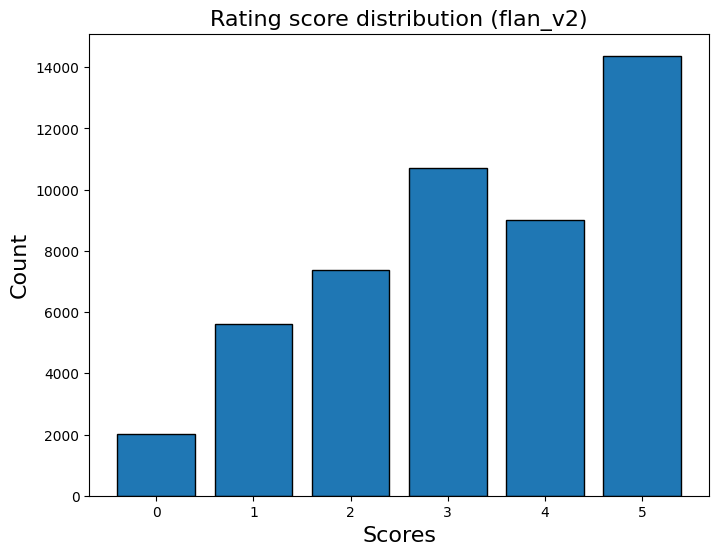

In [23]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

##full dataset
# dataset_list = ['wizardlm', 'lima', 'flan_v2', 'code_alpaca', 'cot', 'oasst1', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded', 'sharegpt'] #, 'sharegpt'

dataset_list=['flan_v2']

model_name="meta/llama-3.1-8b-instruct"
# model_name='google/gemma-2-9b-it'
# model_name= "mistralai/mixtral-8x22b-instruct-v0.1"



for dataset_name in dataset_list:
    path = f"./data/{model_name}/{dataset_name}/"
    orginal_data_path = f"./logs-api/{model_name}/{dataset_name}/"

    if not os.path.exists(path):
        os.makedirs(path)

    original_labels = torch.load(orginal_data_path +'total_output_labels_best.pt')

    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")


    labels_revised = []
    for label in original_labels:
        if label == None or label == -1 or label > 5:
            labels_revised.append(0)
        else:
            labels_revised.append(label)

    label_counts_revised = Counter(labels_revised)
    print(f"Dataset {dataset_name}: Revised {label_counts_revised} \n")

    torch.save(labels_revised, path + "output_labels_revised.pt")

    plt.figure(figsize=(8, 6))
    keys_revised = list(label_counts_revised.keys())
    values_revised = list(label_counts_revised.values())
    plt.bar(keys_revised, values_revised, edgecolor='black')
    plt.title(f'Rating score distribution ({dataset_name})', fontsize=16)

    plt.xlabel('Scores', fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.xticks(keys_revised) 
    plt.show()

## 2. Check the labeling report

In [ ]:
### run the code and check the report

# bash diagnose_tulu.sh

In [39]:
import torch

reports = torch.load("score_curation/results/alignment_tulu/alignment_tulu_report.pt")

In [40]:
reports.detection.keys()
reports.curation.keys()

dict_keys(['label_curation', 'sampling_strategy', 'feature_curation'])

In [22]:
### report structure

{
    'names': {
        'diagnose': {
            'T': None, # square matrix
            'p_clean': None,  # row vector
            'p_org': None,  # row vector
            'class_distribution': None,  # histogram
            'group_distribution': None,  # histogram      
        },
        'detection': {
            'label_error': None, # (index, confidence)
            'coexistence': None, # (index, confidence)
            'rare_example': None, # (index, confidence)
        },
        'curation': {
            'label_curation':  None, # (index, suggested_label, confidence)
            'sampling_strategy': None, # (index, suggested_sample)
            'feature_curation': None, # (index, suggested_feature)      
        },
        'audition': {
            'model_perf': None, # (head_perf, tail_perf, overall_perf). 
            'fairness':  None, # (group_vec, performance_vec), disparity  
            'stress_test': None, # model_perf after distribution shift
        }
    }
}


### 2.1 Print Noise Transition Matrix

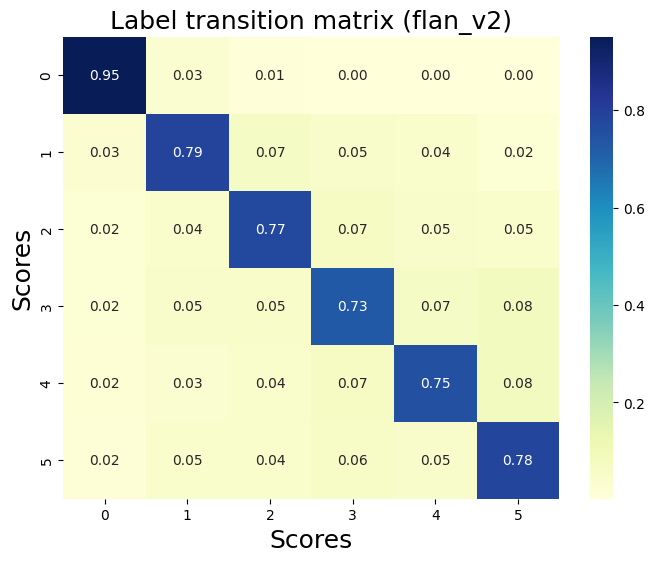

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# Specify dataset and model name
dataset_name = 'flan_v2'
model_name = "meta/llama-3.1-8b-instruct"

# Load report file containing the transition matrix
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"
reports = torch.load(report_path)

# Access the transition matrix data
data = reports.diagnose['T']

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Plot heatmap using seaborn
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")

# Add title and labels for clarity
plt.title(f'Label transition matrix ({dataset_name})', fontsize=18)
plt.xlabel('Scores', fontsize=18)
plt.ylabel('Scores', fontsize=18)

# Display the plot
plt.show()


# 3 Generate small-scale dataset

- Step 1: We first do label-wise samples and directly fiter out low-rated samples
- Step 2: calculate the long-tail score for the remaining samples# 3 Generate small-scale dataset

In [2]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.75: #confidence prob;0.75
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path = f"data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]
print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
for idx, label in enumerate(labels):
    ####################### select labels  ########################
    if label<4: 
        low_quality_label_idx.append(idx)
    elif label == 3 and random.random() >= 0.5:
        low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx + corrupted_samples_total)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

long_tail_scores = np.array(rare_samples_filtered)[:,1]


bins = np.arange(0, max(long_tail_scores)+0.01, 0.01) 

counts, _ = np.histogram(long_tail_scores, bins)


threshold = 530   ## the random threshold for feature-wise

remaining_samples_indices = []

for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
    
    if counts[i] > threshold:
        indices_in_bin = random.sample(list(indices_in_bin), threshold)
    
    remaining_samples_indices.extend(indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]
remaining_samples_idx_1 = remaining_samples_idx
# long_tail_scores_filtered = long_tail_scores[remaining_samples_idx]
long_tail_scores_filtered = np.array(rare_samples_filtered)[remaining_samples_indices, 1]


print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

### the parquet data path
open_instruct_path = './data_refine/tulu_split_parquet/'

dataset_path = open_instruct_path + f"{dataset_name}.parquet"

data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(remaining_samples_idx)

filtered_labels = np.array(labels)[remaining_samples_idx].tolist()
torch.save(filtered_labels, root_path + "filtered_output_labels.pt")

assert len(filtered_dialogs) == len(filtered_labels)



output_json_path = root_path + f"filtered_dataset.json"  ## the json form is for fune-tunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################
# random baseline
print("\n Start creating the random-select dataset!")
full_data_size = len(labels)
data_size = len(filtered_labels)




print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

random_samples_idx = random.sample(list(range(full_data_size)), data_size)

random_dialogs = data['train'].select(random_samples_idx)
output_json_path = root_path + f"random_dataset.json"  ## the json form is for fune-tunning
random_dialogs.to_json(output_json_path)



/home/azureuser/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


==== Docta: Doctor for your data. Current version: 0.2 ====
cured sample size: 1491
corrupted_samples_total: 9273
label size: 49123
Label: 0, Count: 577
Label: 1, Count: 5613
Label: 2, Count: 15986
Label: 3, Count: 15935
Label: 4, Count: 5926
Label: 5, Count: 5086
label_wise_filter_out_samples: 9273
Size of the remaining samples with high quality: 39850
Size of the filtered dataset: 6640


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 30.06ba/s]


output_json_path: data/meta/llama-3.1-8b-instruct/flan_v2/filtered_dataset.json

 Start creating the random-select dataset!
full data size: 49123; random selected size: 6640!!!


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 40.39ba/s]


16225980

# 3.* New method for generating small-scale dataset

- Findings: From the current experiments, we found that simply filter out low-rated samples will hurt the representation because the low-rated samples may be still rare.


New selection strategy is here: **first compare the long-tail distribution between selecting high-rated sample before and after to verify that the long-tail distribution is hurting by directly fiter out the low-rated samples**

- Step 1: directly generate a long-tail distribution
- Step 2: for each interval, rather than random filter out samples, we select the high-rated samples util reaching the threshold
- Step 3: based on this, we can further do some label curation on this, which serves as one incremental technique.


In [9]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.75: #confidence prob;0.75
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path = f"data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]
print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)


for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
# for idx, label in enumerate(labels):
#     ######################## select labels  ########################
#     if label<4: 
#         low_quality_label_idx.append(idx)
#     # elif label == 3 and random.random() >= 0.5:
#     #     low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx + corrupted_samples_total)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples] 

# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

long_tail_scores = np.array(rare_samples_filtered)[:,1]

bins = np.arange(0, max(long_tail_scores)+0.01, 0.01) 


counts, _ = np.histogram(long_tail_scores, bins)


threshold = 850  ## the random threshold for feature-wise

remaining_samples_indices = []



filter_idx=5
threshold = 915
for i in range(len(bins) - 1):
    
    if i <filter_idx:

        indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
        similar_sample_idxs = random.sample(list(indices_in_bin), int(10 * 100 * bins[i]))

        remaining_samples_indices.extend(similar_sample_idxs)
    else:
        indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
        if counts[i] > threshold:

            high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] == 5]

            if len(high_quality_indices_in_bin) >= threshold:

                high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
                remaining_samples_indices.extend(high_quality_indices_in_bin)

            else:
                low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 3]
                print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)};;; len_low: {len(low_quality_indices_in_bin)}")
                low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
                remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

        else:
            remaining_samples_indices.extend(indices_in_bin)


########################################################################################################################


# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     if counts[i] > threshold:
#         indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.
#         high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 4]
#         low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
#         if len(high_quality_indices_in_bin) > threshold//2:
#             high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold//2) 
#         low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold //2)

#         remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

#     else:
#         remaining_samples_indices.extend(indices_in_bin)

########################################################################################################################
# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     if counts[i] > threshold:
#         new_indices_in_bin = random.sample(list(indices_in_bin), threshold)
#         remaining_samples_indices.extend(new_indices_in_bin)

#     else:
#         remaining_samples_indices.extend(indices_in_bin)
########################################################################################################################

# label_to_indices = {i: [] for i in range(1, 6)}

# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i + 1]))[0]
#     if counts[i] > threshold:
#         
#         for idx in indices_in_bin:
#             label = labels[rare_samples_filtered[idx][0]]
#             if 1 <= label <= 5:
#                 label_to_indices[label].append(idx)
        
#         
#         for label in range(3, 6):
#             indices = label_to_indices[label]
#             if len(indices) >= threshold // 3:
#                 sampled_indices = random.sample(indices, threshold // 3)
#             else:
#                 sampled_indices = indices 
#             remaining_samples_indices.extend(sampled_indices)
            
########################################################################################################################

remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]
remaining_samples_idx_2 = remaining_samples_idx
# long_tail_scores_filtered = long_tail_scores[remaining_samples_idx]
long_tail_scores_filtered = np.array(rare_samples_filtered)[remaining_samples_indices, 1]


print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

###the parquet data path
open_instruct_path = './data_refine/tulu_split_parquet/'

dataset_path = open_instruct_path + f"{dataset_name}.parquet"

data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(remaining_samples_idx)

filtered_labels = np.array(labels)[remaining_samples_idx].tolist()
torch.save(filtered_labels, root_path + "filtered_output_labels.pt")

assert len(filtered_dialogs) == len(filtered_labels)

# output_path = root_path + "data/flan_v2/filtered_flan_v2.parquet"
# filtered_dialogs.to_parquet(output_path)

output_json_path = root_path + f"filtered_dataset.json"  ## the json form is for fune-tunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################
# random baseline
print("\n Start creating the random-select dataset!")
full_data_size = len(labels)
data_size = len(filtered_labels)

# data_size = 3000

print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

random_samples_idx = random.sample(list(range(full_data_size)), data_size)
random_dialogs = data['train'].select(random_samples_idx)
output_json_path = root_path + f"random_dataset.json"  ## the json form is for fune-tunning
random_dialogs.to_json(output_json_path)



cured sample size: 1236
corrupted_samples_total: 10351
label size: 49123
Label: 0, Count: 1899
Label: 1, Count: 5447
Label: 2, Count: 7298
Label: 3, Count: 10565
Label: 4, Count: 8915
Label: 5, Count: 14999
label_wise_filter_out_samples: 10351
Size of the remaining samples with high quality: 49123
threshold - len(high_quality_indices_in_bin: 355;;; len_low: 1557
threshold - len(high_quality_indices_in_bin: 592;;; len_low: 818
Size of the filtered dataset: 6639


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.87ba/s]


output_json_path: data/meta/llama-3.1-8b-instruct/flan_v2/filtered_dataset.json

 Start creating the random-select dataset!
full data size: 49123; random selected size: 6639!!!


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 40.38ba/s]


16075646

## 3.*-1 Baseline: select the high-rated samples.

- Here, we select the samples with a rate 5.

In [2]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)



# change the original labels to the suggested label
root_path = f"data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")


## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)


for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
for idx, label in enumerate(labels):
    ######################## select labels  ########################
    if label<=4: 
        low_quality_label_idx.append(idx)
    # elif label == 3 and random.random() >= 0.5:
    #     low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 
samples_filtered = [sample[0] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 


remaining_samples_indices = []

dataset_size = 6668
if len(samples_filtered) >= dataset_size:
    remaining_samples_indices = random.sample(list(samples_filtered), dataset_size)

else:
    high_quality_indices = [sample[0] for sample[0] in rare_samples if labels[sample[0]] == 4]
    new_added_high_quality_indices = random.sample(list(high_quality_indices), dataset_size-len(samples_filtered))
    remaining_samples_indices.extend(new_added_high_quality_indices)
    remaining_samples_indices.extend(samples_filtered)

########################################################################################################################


remaining_samples_idx = np.array(remaining_samples_indices, dtype=int)


print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

###the parquet data path
open_instruct_path = './data_refine/tulu_split_parquet/'

dataset_path = open_instruct_path + f"{dataset_name}.parquet"

data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(remaining_samples_idx)


output_json_path = root_path + f"label-filtered_dataset.json"  ## the json form is for fune-tunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################




Label: 0, Count: 2024
Label: 1, Count: 5625
Label: 2, Count: 7392
Label: 3, Count: 10693
Label: 4, Count: 9011
Label: 5, Count: 14378
label_wise_filter_out_samples: 34745
Size of the filtered dataset: 6668


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57ba/s]


output_json_path: data/meta/llama-3.1-8b-instruct/flan_v2/label-filtered_dataset.json


## 3.*-1-1 New Baseline: select the high rated samples also with the diversity 

- From paper: what makes good data for alignment? a comprehensive study of automatic data selection in instruction tunning

- Here, we implement an algorithm that repetitively calculate the embedding distance with the new sample, and select sample one by one using a threshold untill reach the data sample size.


In [4]:
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Mean pooling to get sentence embeddings
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # All token embeddings from model output
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

print("Preprocessing dataset...")

# Load dataset
dataset_name = "flan_v2"
open_instruct_path = './data_refine/tulu_split_parquet/'
dataset_path = open_instruct_path + f"{dataset_name}.parquet"
data = load_dataset('parquet', data_files=dataset_path)
dialogs = data['train']
inputs = []

# Process dialogues into single conversation text
def process_dialog(dialog):
    conversation = ""
    for message in dialog['messages']:
        conversation += f"### {message['role']}: {message['content']}\n"
    return {"features": conversation}

data['train'] = data['train'].map(process_dialog, batched=False)

# Load pretrained model and tokenizer
model_name = "BAAI/bge-large-en-v1.5"  # You can replace with other embedding models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

# Define function to generate embeddings
def embed_text(batch):
    encoded_inputs = tokenizer(batch['features'], padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        model_outputs = model(**encoded_inputs)

    sentence_embeddings = mean_pooling(model_outputs, encoded_inputs['attention_mask'].to(device))
    embeddings = F.normalize(sentence_embeddings, p=2, dim=1)  # Normalize embeddings

    # Move embeddings to CPU and convert to saveable format
    batch['embeddings'] = embeddings.cpu().numpy().tolist()
    return batch

# Process each item in the dataset to create embeddings
data['train'] = data['train'].map(embed_text, batched=True, batch_size=512)

# Save dataset with embeddings to a Parquet file
data['train'].to_parquet(f'{dataset_name}_embeddings.parquet')
print(f"Embeddings saved to {dataset_name}_embeddings.parquet")


Using device: cuda
Preprocessing dataset...


Creating parquet from Arrow format: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 21.81ba/s]


Embeddings saved to 'output_embeddings.parquet'


In [6]:
from datasets import load_dataset

embedding_dataset = load_dataset("parquet", data_files=f"{dataset_name}_embeddings.parquet")['train']
embedding_dataset

In [9]:
from datasets import load_dataset, Dataset
import torch
import torch.nn.functional as F
import random
import numpy as np
from tqdm import tqdm

random.seed(42)

# Function to compute cosine distance
def cosDistance(sample_embedding, selected_embeddings, k_near=10):
    # Calculate cosine similarity and convert it to distance
    similarity_vector = torch.matmul(selected_embeddings, sample_embedding)
    distance_vector = 1.0 - similarity_vector
    if selected_embeddings.size(0) > k_near:
        distance_vector, _ = torch.topk(distance_vector, k=k_near, dim=0)
    mean_distance = distance_vector.mean()
    return mean_distance

# Load embeddings and labels
dataset_name = 'flan_v2'
model_name = "meta/llama-3.1-8b-instruct"
root_path = f"data/{model_name}/{dataset_name}/"
labels = torch.load(root_path + "output_labels_revised.pt")
embedding_dataset = load_dataset("parquet", data_files=f'{dataset_name}_embeddings.parquet')['train']

# Filter based on high-quality labels
high_quality_label_idx_5 = [idx for idx, label in enumerate(labels) if label == 5]
high_quality_label_idx_4 = [idx for idx, label in enumerate(labels) if label == 4]
embedding_dataset_5 = embedding_dataset.select(high_quality_label_idx_5)
embedding_dataset_4 = embedding_dataset.select(high_quality_label_idx_4)

tot_data_size = 6600
threshold = 0.9
k_near = 10
selected_embeddings = None
selected_samples = []

# Select samples with label=5 using cosine distance threshold
for sample in tqdm(embedding_dataset_5, desc="Processing high-quality samples (label=5)"):
    sample_embedding = torch.tensor(sample['embeddings'])
    if selected_embeddings is None:
        selected_embeddings = sample_embedding.unsqueeze(0)
        selected_samples.append(sample)
        continue
    
    if cosDistance(sample_embedding, selected_embeddings, k_near=k_near) < threshold:
        selected_embeddings = torch.cat((selected_embeddings, sample_embedding.unsqueeze(0)), dim=0)
        selected_samples.append(sample)
    
    if len(selected_samples) == tot_data_size:
        break

print(f"Current selected data size: {len(selected_samples)}; still need to select from 4-rated samples.")

# Select remaining samples from label=4 if needed
if len(selected_samples) < tot_data_size:
    for sample in tqdm(embedding_dataset_4, desc="Processing high-quality samples (label=4)"):
        sample_embedding = torch.tensor(sample['embeddings'])
        if cosDistance(sample_embedding, selected_embeddings, k_near=k_near) < threshold:
            selected_embeddings = torch.cat((selected_embeddings, sample_embedding.unsqueeze(0)), dim=0)
            selected_samples.append(sample)
        
        if len(selected_samples) == tot_data_size:
            break

# Convert selected samples to Dataset format and save
selected_dataset = Dataset.from_dict({col: [s[col] for s in selected_samples] for col in selected_samples[0].keys()})
print(f"Selected data size: {len(selected_dataset)}")
selected_dataset.to_json(root_path + f'diversity-filtered_dataset.json', orient='records', lines=True)
print("Dataset saved to 'diversity-filtered_dataset.json'")


Processing high-quality samples (label=5):  46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | 6599/14378 [00:59<01:09, 111.59it/s]


current selected data size: 6600; still need select sample from 4-rated sampels
selected data size: 6600


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18ba/s]


Dataset saved to 'selected_dataset.json'


### Plot the long-tail score distribution

Size of the original samples with high quality: 49123
Size of the remaining samples with high quality: 38772
Size of the remaining samples with high quality: 38772


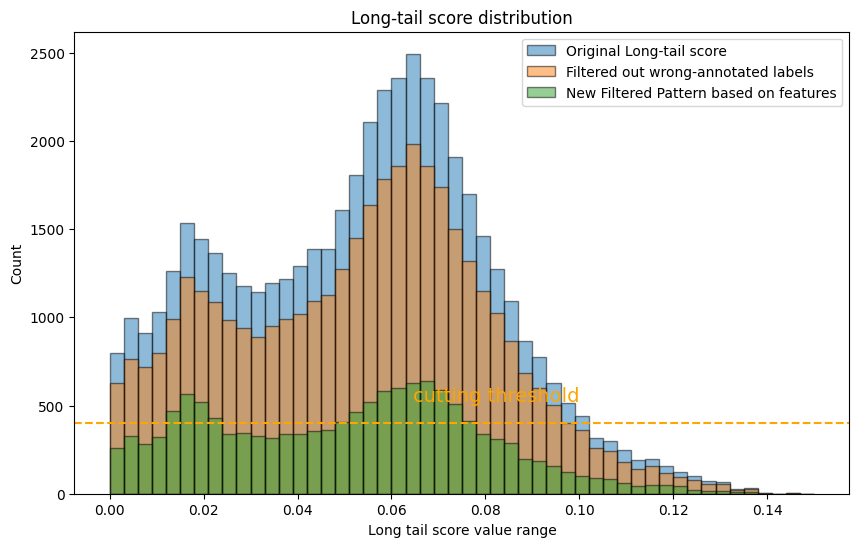

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)
rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_orginal = [[sample[0], sample[1]] for sample in rare_samples] 

rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 

print(f"Size of the original samples with high quality: {len(rare_samples_orginal)}")
print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


long_tail_scores_filtered = np.array(rare_samples_filtered)[:,1]

long_tail_scores_orginal = np.array(rare_samples_orginal)[:,1]



bins = np.arange(0, max(max(long_tail_scores_filtered), max(long_tail_scores_orginal)) + 0.003, 0.003)


counts, _ = np.histogram(long_tail_scores_filtered, bins)
threshold = 530   ## the random threshold for feature-wise
remaining_samples_indices = []
for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores_filtered >= bins[i]) & (long_tail_scores_filtered < bins[i+1]))[0]
    # if counts[i] > threshold:
    #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]

    #     if len(high_quality_indices_in_bin) >= threshold:

    #         high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
    #     remaining_samples_indices.extend(high_quality_indices_in_bin)

    #     # else:
    #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)}")
    #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
    #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
    #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

    # else:
    #     remaining_samples_indices.extend(indices_in_bin)

    high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]
    remaining_samples_indices.extend(high_quality_indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]

long_tail_scores_filtered_new = np.array(rare_samples_filtered)[remaining_samples_indices, 1]




plt.figure(figsize=(10, 6))

plt.hist(long_tail_scores_orginal, bins, alpha=0.5, label='Original Long-tail score', edgecolor='black')

plt.hist(long_tail_scores_filtered, bins, alpha=0.5, label='Filtered out wrong-annotated labels', edgecolor='black')

plt.hist(long_tail_scores_filtered_new, bins, alpha=0.5, label='New Filtered Pattern based on features', edgecolor='black')


plt.title('Long-tail score distribution')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

plt.legend(loc='upper right')

threshold_value = 400  
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

plt.show()




Size of the original samples with high quality: 6788
Size of the remaining samples with high quality: 6684
Size of the remaining samples with high quality: 6684


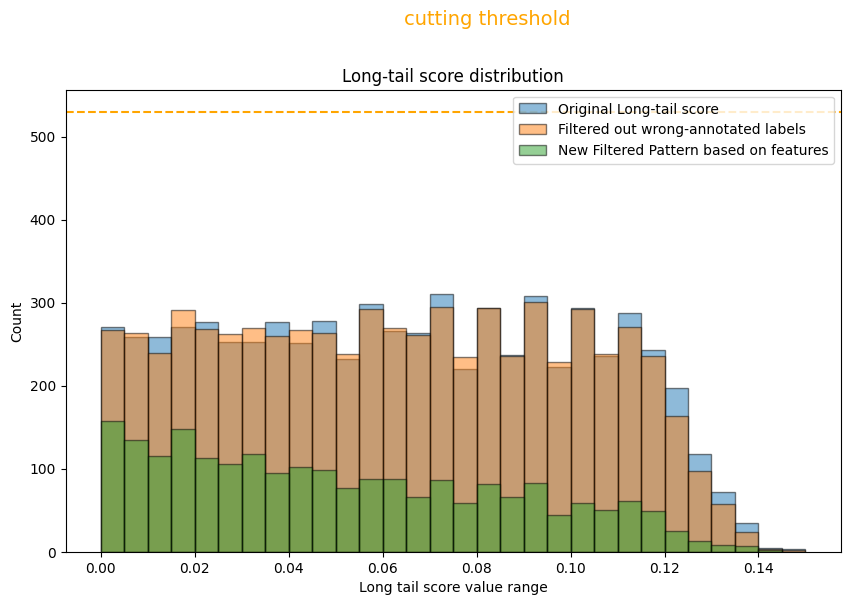

In [35]:
import numpy as np
import matplotlib.pyplot as plt

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_orginal = [[sample[0], sample[1]] for sample in rare_samples if sample[0] in set(remaining_samples_idx_2)] 

rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] in set(remaining_samples_idx_1)] 

print(f"Size of the original samples with high quality: {len(rare_samples_orginal)}")
print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


long_tail_scores_filtered = np.array(rare_samples_filtered)[:,1]

long_tail_scores_orginal = np.array(rare_samples_orginal)[:,1]



bins = np.arange(0, max(max(long_tail_scores_filtered), max(long_tail_scores_orginal)) + 0.005, 0.005)


counts, _ = np.histogram(long_tail_scores_filtered, bins)
threshold = 530   ## the random threshold for feature-wise
remaining_samples_indices = []
for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores_filtered >= bins[i]) & (long_tail_scores_filtered < bins[i+1]))[0]
    # if counts[i] > threshold:
    #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]

    #     if len(high_quality_indices_in_bin) >= threshold:

    #         high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
    #     remaining_samples_indices.extend(high_quality_indices_in_bin)

    #     # else:
    #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)}")
    #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
    #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
    #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

    # else:
    #     remaining_samples_indices.extend(indices_in_bin)

    high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 4]
    remaining_samples_indices.extend(high_quality_indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]

long_tail_scores_filtered_new = np.array(rare_samples_filtered)[remaining_samples_indices, 1]





plt.figure(figsize=(10, 6))
plt.hist(long_tail_scores_orginal, bins, alpha=0.5, label='Original Long-tail score', edgecolor='black')
plt.hist(long_tail_scores_filtered, bins, alpha=0.5, label='Filtered out wrong-annotated labels', edgecolor='black')
plt.hist(long_tail_scores_filtered_new, bins, alpha=0.5, label='New Filtered Pattern based on features', edgecolor='black')


plt.title('Long-tail score distribution')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')


plt.legend(loc='upper right')

threshold_value = 530  
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

plt.show()


## Plot the label infos within each bin

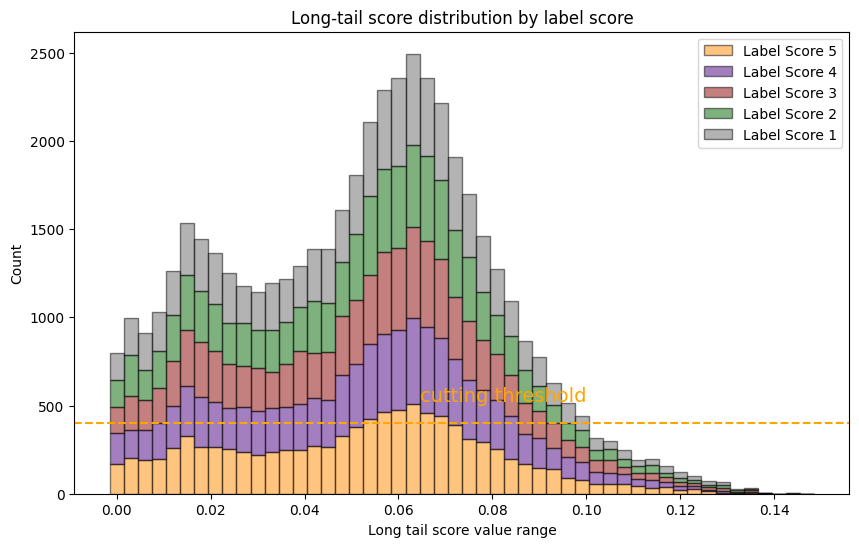

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Assuming 'labels' is a dictionary with each rare_sample's index mapped to a label score
# Example: labels = {index: score, ...}
# Here, we generate a sample dictionary with labels between 1 and 5.
labels = {sample[0]: np.random.randint(1, 6) for sample in rare_samples}  # Replace with actual data as needed

# Extract long-tail scores from rare_samples
long_tail_scores = np.array(rare_samples)[:, 1]

# Define bins with a specified interval for histogram distribution
bins = np.arange(0, max(long_tail_scores) + 0.003, 0.003)

# Group scores by label (assumes labels are between 1 and 5)
grouped_counts = {i: np.zeros(len(bins) - 1) for i in range(1, 6)}
for i, score in enumerate(long_tail_scores):
    label = labels[rare_samples[i][0]]
    bin_index = np.digitize(score, bins) - 1  # Find bin for the score
    grouped_counts[label][bin_index] += 1  # Increment count for label in the respective bin

# Plot stacked histogram
plt.figure(figsize=(10, 6))

# Define colors and alpha for transparency
colors = ['darkorange', 'indigo', 'darkred', 'darkgreen', 'dimgray']
alpha = 0.5  # Set transparency to 50%

# Plot each label's distribution as a stacked bar
bottom = np.zeros(len(bins) - 1)
for i in range(5, 0, -1):  # Iterate from label 5 to 1 for stacking order
    plt.bar(bins[:-1], grouped_counts[i], width=np.diff(bins), bottom=bottom,
            color=colors[5 - i], edgecolor='black', alpha=alpha, label=f'Label Score {i}')
    bottom += grouped_counts[i]

# Add title and labels
plt.title('Long-tail score distribution by label score')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# Add legend
plt.legend(loc='upper right')

# Add threshold line with label
threshold_value = 400  # Example threshold; adjust based on your data
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

# Display plot
plt.show()


## 3.*-2 Check the model-generated labels from different labeling models.

In [51]:
import torch
import numpy as np

# Specify dataset name and list of model names
dataset_name = 'flan_v2'
model_names = ["meta/llama-3.1-8b-instruct", 'google/gemma-2-9b-it', "mistralai/mixtral-8x22b-instruct-v0.1"]

# Initialize an empty list to store labels for all models
all_labels = []

for model_name in model_names:
    # Construct the root path for each model
    root_path = f"data/{model_name}/{dataset_name}/"
    
    # Load labels for each model and add to the all_labels list
    labels = torch.load(root_path + "output_labels_revised.pt")
    all_labels.append(labels)

# Stack the labels into an n*3 NumPy array where each column is a model's labels
combined_labels = np.column_stack(all_labels)

# Print shape of the combined array to confirm it is n*3
print(combined_labels.shape)

# Preview the first few rows of the combined array
print(combined_labels[:5])


(49123, 3)
[[4 3 5]
 [2 3 5]
 [4 1 1]
 [2 3 5]
 [4 4 5]]


## 3.3 Create a random selection sampling method

In [6]:
import torch 
import random
import numpy as np
from datasets import load_dataset


dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"

root_path = f"data/{model_name}/{dataset_name}/"

#full size
labels = torch.load(root_path + "output_labels_revised.pt")

#selected size
filtered_labels = torch.load(root_path + "filtered_output_labels.pt")

full_data_size = len(labels)
data_size = len(filtered_labels)
print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

random_samples_idx = random.sample(list(range(full_data_size)), data_size)



dataset_path = root_path + f"{dataset_name}.parquet"
data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(random_samples_idx)


output_json_path = root_path + f"random_dataset.json"  ## the json form is for fine-tunning
filtered_dialogs.to_json(output_json_path)


full data size: 49123; random selected size: 1208!!!


FileNotFoundError: Unable to find '/mnt/batch/tasks/shared/LS_root/mounts/clusters/jinlong-exp/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/labeling/data/meta/llama-3.1-8b-instruct/flan_v2/flan_v2.parquet'

### 3.2 Plot the filtered feature-wise long tail score

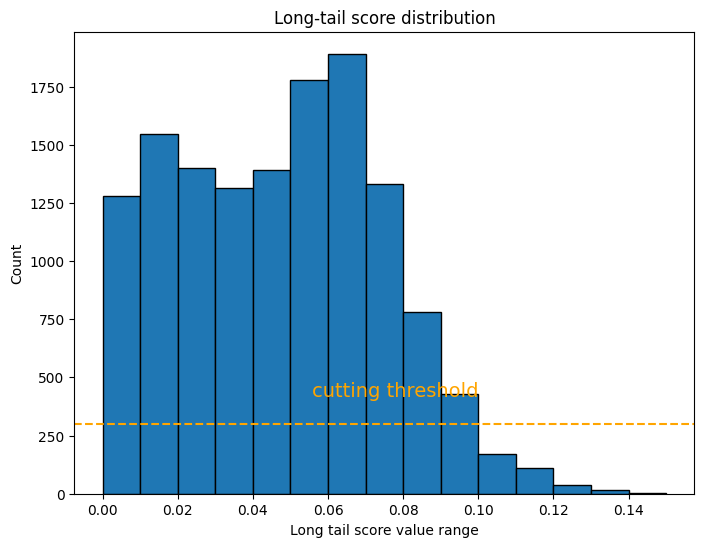

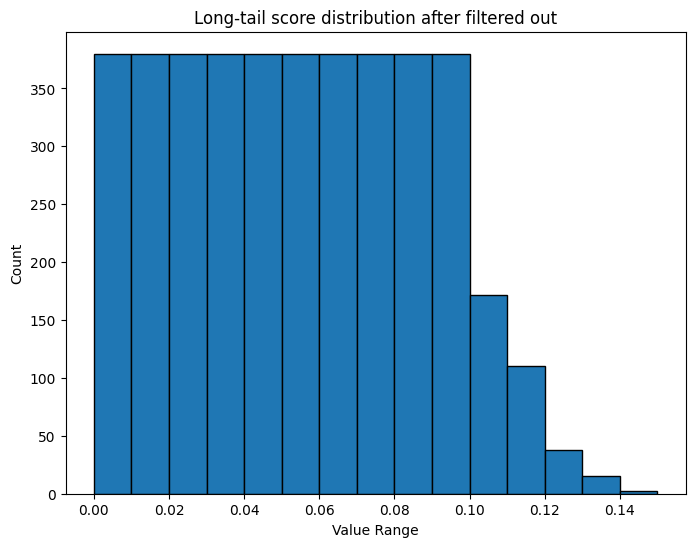

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sample threshold value
threshold_value = 300

# Define bins for histogram
bins = np.arange(0, max(long_tail_scores) + 0.01, 0.01)

# Compute histogram counts for the original long_tail_scores
counts, _ = np.histogram(long_tail_scores, bins)

# Plot histogram for original scores
plt.figure(figsize=(8, 6))
plt.hist(long_tail_scores, bins, edgecolor='black')

# Add title and axis labels
plt.title('Long-tail score distribution')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# Add a horizontal line and label for the threshold
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

# Display the plot
plt.show()

# Histogram for filtered long_tail_scores
bins = np.arange(0, max(long_tail_scores_filtered) + 0.01, 0.01)

# Compute histogram counts for the filtered scores
counts, _ = np.histogram(long_tail_scores_filtered, bins)

# Plot histogram for filtered scores
plt.figure(figsize=(8, 6))
plt.hist(long_tail_scores_filtered, bins, edgecolor='black')

# Add title and axis labels for the filtered plot
plt.title('Long-tail score distribution after filtered out')
plt.xlabel('Value Range')
plt.ylabel('Count')

# Display the filtered plot
plt.show()


In [19]:
long_tail_scores_filtered

array([0.0027, 0.0055, 0.0085, ..., 0.2625, 0.2736, 0.281 ])

In [134]:

dataset_path = root_path + "data/tulu/filtered_flan_v2.parquet"
data = load_dataset('parquet', data_files=dataset_path)


Generating train split: 23672 examples [00:00, 31009.59 examples/s]


In [122]:
len(corrupted_samples_total)

7451

In [103]:
data = reports.detection['rare_example']


In [104]:
data = data[:len(data)//2]

In [88]:
assert len(reports.curation['label_curation']) == len(reports.detection['label_error'])

In [91]:
len(reports.detection['label_error'])

9369

## 4. Convert .Parquet to .Jsonl.gz form for datasets

In [15]:
import pandas as pd
import json
import gzip
import numpy as np

# Read the .parquet file
parquet_file = 'data/tulu/flan_v2.parquet'
df = pd.read_parquet(parquet_file)

# Define output JSON Lines file with gzip compression
jsonl_gz_file = 'data/tulu/flan_v2.jsonl.gz'
with gzip.open(jsonl_gz_file, 'wt', encoding='utf-8') as f:
    for record in df.to_dict(orient='records'):
        # Convert 'messages' column from ndarray to list if necessary
        if isinstance(record['messages'], (pd.Series, pd.DataFrame, np.ndarray)):
            record['messages'] = record['messages'].tolist()
        f.write(json.dumps(record) + '\n')

print(f"Converted {parquet_file} to {jsonl_gz_file}")


Converted data/tulu/flan_v2.parquet to data/tulu/flan_v2.jsonl.gz


## 5 Generate dataset to evaluate the performance gap between high-rated samples and low-rated sample

In [6]:
import torch 
import random
import numpy as np
from datasets import load_dataset

## label curation reports
reports = torch.load("score_curation/results/tulu_flan_v2/tulu_flan_v2_report.pt")

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.75: #confidence prob;0.75
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path ="score_curation/"
labels = torch.load(root_path + "data/gemma/flan_v2/output_labels_revised.pt")

# for sample_label in cured_sample_labels:
#     labels[sample_label[0]] = sample_label[1]
# print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)


for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

label_1_indices = np.where(labels == 1)[0]
label_5_indices = np.where(labels == 5)[0]

num_samples = 1500
if len(label_1_indices) >= num_samples and len(label_5_indices) >= num_samples:
    selected_label_1_samples = random.sample(list(label_1_indices), num_samples)
    selected_label_5_samples = random.sample(list(label_5_indices), num_samples)
else:
    print("Not enough samples in one of the labels.")

print(f"Selected {len(selected_label_1_samples)} samples from label 1.")
print(f"Selected {len(selected_label_5_samples)} samples from label 5.")



dataset_name = 'flan_v2'

data_path = './data_refine/tulu_split_parquet/'

dataset_path = data_path + f"{dataset_name}.parquet"
data = load_dataset('parquet', data_files=dataset_path)
output_json_path_1 = root_path + "data/gemma/flan_v2/label_1_1500samples.json"
output_json_path_5 = root_path + "data/gemma/flan_v2/label_5_1500samples.json"

label_1_dialogs = data['train'].select(selected_label_1_samples)
label_1_dialogs.to_json(output_json_path_1)


label_5_dialogs = data['train'].select(selected_label_5_samples)
label_5_dialogs.to_json(output_json_path_5)



/home/azureuser/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_40411/1047514123.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_o

==== Docta: Doctor for your data. Current version: 0.2 ====
cured sample size: 1765
corrupted_samples_total: 7402
Label: 0, Count: 5215
Label: 1, Count: 1858
Label: 2, Count: 8806
Label: 3, Count: 22345
Label: 4, Count: 1427
Label: 5, Count: 9472
Selected 1500 samples from label 1.
Selected 1500 samples from label 5.


/tmp/ipykernel_40411/1047514123.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load(root_path + "data/gemma/flan_v2/output_labels_revised.pt")
Creating 

3594829

### Check the data

In [17]:
import json

root_path ="score_curation/"

def read_samples_content(file_path, num_samples=1):
    samples = []
    with open(file_path, 'r') as file:
        for line in file:
            if len(samples) < num_samples:
                data = json.loads(line)
                for message in data['messages']:
                    samples.append(message['content'])
            else:
                break
    return samples

output_json_path_1 = root_path + "data/gemma/flan_v2/label_1_1500samples.json"
output_json_path_5 = root_path + "data/gemma/flan_v2/label_5_1500samples.json"

contents_label_1 = read_samples_content(output_json_path_1)
contents_label_5 = read_samples_content(output_json_path_5)

print("Contents from label 1:")
for content in contents_label_1:
    print('#'*100)
    print(content)

print('@'*150)
print("\nContents from label 5:")
for content in contents_label_5:
    print('#'*100)
    print(content)



Contents from label 1:
Premise & hypothesis: Is the premise "Business attired man having a shoeshine on a busy street." true if "A businessman is walking on the street."?
A: no

Premise & hypothesis: Is the premise "A man in midair about to land on a snowboard." true if "the man is really tired"?
A: it is not possible to tell

Premise & hypothesis: Is the premise "A referee indicating the winner of a wrestling match." true if "there is a sport being played"?
A: yes

Premise & hypothesis: Is the premise "A woman and a young girl in a purple jacket are looking at sweets in a shop." true if "Two boys in red are dancing."?
A:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [3]:
import torch 
import random
import numpy as np
from datasets import load_dataset
from collections import Counter

random.seed(3)

# Specify dataset and model details
dataset_name = 'all_train'
model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"
dataset_size = 2500

# Load curation report
report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"
reports = torch.load(report_path)

# Part 1: Label curation based on detected label errors
corrupted_samples = [x[0] for x in reports.detection['label_error']]

# Identify high-confidence samples for curation
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']:  # (idx, label, confidence)
    if sample[2] >= 1:  # confidence threshold
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))

print(f"Cured sample size: {len(cured_sample_labels)}")

# Exclude cured samples from corrupted samples list
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"Corrupted samples total: {len(corrupted_samples_total)}")

# Update labels to the curated labels
root_path = f"./model_finetune/selected_data/{model_name}/{dataset_name}/"
labels = torch.load(root_path + "output_labels_revised.pt")

print(f"Original Counter(labels): {Counter(labels)}")

# Apply cured labels to original labels
for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]

print(f"Label size: {len(labels)}")
print(f"Revised Counter(labels): {Counter(labels)}")

# Collect indices of corrupted samples for filtering
label_wise_filter_out_samples = set(corrupted_samples_total)
print(f"Label-wise filter out samples: {len(label_wise_filter_out_samples)}")

# Part 2: Handle rare examples by selecting high-quality samples
rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example']) // 2]
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples]

print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

# Filter indices initialization
filtered_indices = []

# Loop through target labels, starting with high quality (label 5 down to 1)
for target_label in [5, 4, 3, 2, 1]:
    if len(filtered_indices) >= dataset_size:
        break

    # Find indices with the target label
    label_indices = [idx for idx in range(len(labels)) if labels[idx] == target_label]

    # Add the indices if there's space in the dataset size limit
    if dataset_size - len(filtered_indices) > len(label_indices):
        filtered_indices.extend(label_indices)
    else:
        rated_samples = [[sample[0], sample[1]] for sample in rare_samples if sample[0] in set(label_indices)]
        
        remain_data_size = dataset_size - len(filtered_indices)

        if rated_samples:  # Ensure rated_samples is non-empty
            sorted_samples = sorted(rated_samples, key=lambda x: x[1], reverse=True)[:remain_data_size]
            sorted_samples_indices = np.array(sorted_samples)[:, 0].astype(int)
            filtered_indices.extend(sorted_samples_indices)

    print("Size of the filtered dataset:", len(filtered_indices))

# Load the dataset and select filtered samples
data = load_dataset('json', data_files=root_path + 'full_dataset.json')
filtered_dialogs = data['train'].select(filtered_indices)

# Save the filtered dataset
filtered_dialogs.to_json(root_path + f"filtered


Cured sample size: 0
Corrupted samples total: 190136
Original Counter(labels): Counter({3: 116114, 4: 57669, 2: 48254, 1: 47402, 0: 27386, 5: 4107})
Label size: 300932
Revised Counter(labels): Counter({3: 116114, 4: 57669, 2: 48254, 1: 47402, 0: 27386, 5: 4107})
Label-wise filter out samples: 190136
Size of the remaining samples with high quality: 300932
Size of the filtered dataset: 2500


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.77ba/s]


7605900